<a href="https://colab.research.google.com/github/plaban1981/NLP-Transfer-Learning/blob/master/zero_shot_pipeline_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/huggingface/transformers.git
!pip install GetOldTweets3

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-n6vmlh1v
  Running command git clone -q https://github.com/huggingface/transformers.git /tmp/pip-req-build-n6vmlh1v
     |████████████████████████████████| 3.0MB 6.4MB/s 
     |████████████████████████████████| 1.1MB 41.4MB/s 
     |████████████████████████████████| 890kB 39.0MB/s 
  Created wheel for transformers: filename=transformers-3.0.2-cp36-none-any.whl size=867670 sha256=ba4e52ef39727b497b9a782c218e98fd10aa7dbd62a372415983130a16a31948
  Stored in directory: /tmp/pip-ephem-wheel-cache-0qa7agac/wheels/33/eb/3b/4bf5dd835e865e472d4fc0754f35ac0edb08fe852e8f21655f
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=a79417e5177c35602e3860f634b38d233228a353791ca3830493c7136311e6ab
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built transformers sacremoses


In [ ]:
import GetOldTweets3 as got
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import pipeline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
classifier = pipeline("zero-shot-classification")

Some weights of the model checkpoint at facebook/bart-large-mnli were not used when initializing BartForSequenceClassification: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing BartForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BartForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# Function that pulls tweets based on a general search query

# Parameters: (text query you want to search), (max number of most recent tweets to pull from)
def text_query_to_df(text_query, count):
    # Creation of query object
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(text_query)\
                                                .setMaxTweets(count).setLang('en')
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)

    # Creating list of chosen tweet data
    text_tweets = [[tweet.date, tweet.text] for tweet in tweets]

    # Creation of dataframe from tweets
    tweets_df = pd.DataFrame(text_tweets, columns = ['Datetime', 'Text'])

    return tweets_df

# Input search query to scrape tweets and name csv file
# Max recent tweets pulls x amount of most recent tweets from that user
txt = 'climate fight'
max_recs = 500

# Calling function to query X amount of relevant tweets and create a CSV file
tweets_df = text_query_to_df(txt, max_recs)

In [ ]:
tweets_df.head(10)

,Datetime,Text
0,2020-08-20 07:55:23+00:00,CA state leaders are considering legislation t...
1,2020-08-20 07:54:20+00:00,RT GretaThunberg: Indigenous peoples are on th...
2,2020-08-20 07:52:08+00:00,You've got it all wrong. It's organised arson ...
3,2020-08-20 07:49:19+00:00,wef: This Indian activist says its time to use...
4,2020-08-20 07:46:57+00:00,"again, not to be insensitive, but I've been se..."
5,2020-08-20 07:44:26+00:00,Retweet @CopernicusLand: RT EU_ENV: The #Balti...
6,2020-08-20 07:44:06+00:00,Aren’t these the people who are trying to figh...
7,2020-08-20 07:39:31+00:00,This is insanity. So many layers : stolen indi...
8,2020-08-20 07:38:04+00:00,A Fight Over the Nile Is a Preview of Climate ...
9,2020-08-20 07:31:56+00:00,The fight against 'climate-wrecking' dirty air...


In [ ]:
candidate_labels = ["renewable", "politics", "emission", "temperature", "emergency", "advertisment"]
candidate_results = [0, 0, 0, 0, 0, 0]

for sent in tqdm(tweets_df['Text'].values):
    # To do multi-class classification, simply pass multi_class=True.
    # In this case, the scores will be independent, but each will fall between 0 and 1.
    res = classifier(sent, candidate_labels)

    if res['labels'][0] == 'renewable' and res['scores'][0] > 0.5:
        candidate_results[0] = candidate_results[0] + 1
    if res['labels'][0] == 'politics' and res['scores'][0] > 0.5:
        candidate_results[1] = candidate_results[1] + 1
    if res['labels'][0] == 'emission' and res['scores'][0] > 0.5:
        candidate_results[2] = candidate_results[2] + 1
    if res['labels'][0] == 'temperature' and res['scores'][0] > 0.5:
        candidate_results[3] = candidate_results[3] + 1
    if res['labels'][0] == 'emergency' and res['scores'][0] > 0.5:
        candidate_results[4] = candidate_results[4] + 1
    if res['labels'][0] == 'advertisment' and res['scores'][0] > 0.5:
        candidate_results[5] = candidate_results[5] + 1

    if res['scores'][0] > 0.5:
        print(sent)
        print(res['labels'])
        print(res['scores'])
        print('\n')

print(candidate_results)

  1%|▏         | 7/500 [00:32<35:00,  4.26s/it]

Aren’t these the people who are trying to fight climate change? Why are they lighting fires?
['emission', 'temperature', 'emergency', 'politics', 'advertisment', 'renewable']
[0.8536303639411926, 0.051688067615032196, 0.04943942651152611, 0.026109909638762474, 0.014142360538244247, 0.0049898214638233185]




  2%|▏         | 9/500 [00:39<31:15,  3.82s/it]

A Fight Over the Nile Is a Preview of Climate Change Diplomacy 
['emission', 'temperature', 'advertisment', 'emergency', 'renewable', 'politics']
[0.7361546754837036, 0.07401623576879501, 0.059688061475753784, 0.05410240963101387, 0.03978852927684784, 0.03625009208917618]




  2%|▏         | 10/500 [00:41<27:51,  3.41s/it]

The fight against 'climate-wrecking' dirty air that puts public health at risk 
['emission', 'emergency', 'temperature', 'advertisment', 'renewable', 'politics']
[0.5259525179862976, 0.34289416670799255, 0.06536970287561417, 0.03543940931558609, 0.017562273889780045, 0.01278192363679409]




  2%|▏         | 11/500 [00:44<25:07,  3.08s/it]

Perennial Vegetables Are a Solution in the Fight Against Hunger and Climate Change 
['renewable', 'emission', 'emergency', 'advertisment', 'temperature', 'politics']
[0.8596188426017761, 0.042607832700014114, 0.033667199313640594, 0.03256342187523842, 0.022922346368432045, 0.008620401844382286]




  3%|▎         | 17/500 [01:10<31:47,  3.95s/it]

Fight climate change! Go vegan! Save energy! Use and produce regenerative energy! Drive all-electric now! 
['emission', 'emergency', 'renewable', 'advertisment', 'temperature', 'politics']
[0.6271826028823853, 0.13149280846118927, 0.10206611454486847, 0.08433355391025543, 0.03869295120239258, 0.01623201183974743]




  5%|▌         | 27/500 [01:53<32:43,  4.15s/it]

To me this classic "look over there" distraction. Start a fight about something that may never happen, gauge the reaction then change the policy as they go. Classic of this government. No one talking about anything else Aged Care, Ruby Princess, the climate.
['politics', 'temperature', 'emission', 'advertisment', 'renewable', 'emergency']
[0.8606487512588501, 0.06335213780403137, 0.02762649394571781, 0.021811282262206078, 0.017869658768177032, 0.008691671304404736]




  6%|▌         | 28/500 [01:58<33:55,  4.31s/it]

Yep. Our prison slaves are too ill from the uncontrolled deadly global pandemic to fight the climate-change induced wildfires, and Joe Biden’s abandoning the public option and his commitment to end fossil fuel subsidies. Vote blue, though, amirite?
['emergency', 'politics', 'emission', 'advertisment', 'temperature', 'renewable']
[0.7827187180519104, 0.09231392294168472, 0.07616034895181656, 0.022060804069042206, 0.015374955721199512, 0.011371293105185032]




  6%|▌         | 31/500 [02:11<33:45,  4.32s/it]

“Our slave labour firefighters are too sick from the global plague to fight the climate change wildfires.” was not on my 2020 bingo card but here we are. 
['emergency', 'emission', 'advertisment', 'politics', 'temperature', 'renewable']
[0.5946449041366577, 0.23406358063220978, 0.0563119575381279, 0.04225359857082367, 0.0385693795979023, 0.03415656462311745]




  6%|▋         | 32/500 [02:16<35:16,  4.52s/it]

Prison labor is CA’s primary “hand crew” firefighting force, but bc of inmate COVID-19 outbreaks we don’t have the resources to fight this. Climate change, social injustice, deadly virus, it’s all connected. 
['emergency', 'emission', 'temperature', 'advertisment', 'politics', 'renewable']
[0.5680723190307617, 0.1714521050453186, 0.07870786637067795, 0.07077698409557343, 0.07004363089799881, 0.0409470796585083]




  7%|▋         | 34/500 [02:23<30:51,  3.97s/it]

whoever said climate change isn’t real can come fight these fires themselves
['emergency', 'emission', 'temperature', 'advertisment', 'renewable', 'politics']
[0.6695813536643982, 0.18521536886692047, 0.07335791736841202, 0.030172225087881088, 0.026967355981469154, 0.014705757610499859]




  7%|▋         | 37/500 [02:37<35:57,  4.66s/it]

We have already started, we have no more time left. If we don’t fight climate change with extreme radical measures within the next 10 years, my kids are doomed. Biden will not do anything with actual impact, so 8 years of too little or 4 years of nothing... 4 years is better.
['emergency', 'politics', 'emission', 'temperature', 'renewable', 'advertisment']
[0.5271612405776978, 0.23347154259681702, 0.08286815136671066, 0.061241429299116135, 0.059563588351011276, 0.0356939472258091]




  8%|▊         | 42/500 [02:58<31:25,  4.12s/it]

Biden offers all kinds of policies: raising the minimum wage, re-engaging in the fight against climate change, protecting healthcare coverage and adding a public option, police reform etc. 
['politics', 'emission', 'temperature', 'advertisment', 'renewable', 'emergency']
[0.5685984492301941, 0.17087119817733765, 0.12440532445907593, 0.06568029522895813, 0.039663299918174744, 0.030781473964452744]




  9%|▉         | 45/500 [03:10<31:00,  4.09s/it]

Despite our state (New Mexico) not being know by many Americans, today the governor spoke of how we’ve been a leader in the fight for renewable and clean energy. She also added how a vote for Donald Trump is a step in the wrong direction for climate change. 
['renewable', 'politics', 'temperature', 'emission', 'emergency', 'advertisment']
[0.7014621496200562, 0.09019477665424347, 0.06549208611249924, 0.055334292352199554, 0.046039510518312454, 0.041477203369140625]




  9%|▉         | 47/500 [03:20<32:55,  4.36s/it]

We're not going to have anything left to fight for if we don't vote for the "REAL" #GND. Time is of the essence for those that believe in the climate crisis. #HowieHawkins 
['emergency', 'politics', 'renewable', 'emission', 'temperature', 'advertisment']
[0.6219228506088257, 0.19196006655693054, 0.06839118897914886, 0.05054228752851486, 0.042399074882268906, 0.024784570559859276]




 10%|▉         | 48/500 [03:24<32:34,  4.32s/it]

Do you believe in Climate Change @brendancassell3? Climate change is one of the most pressing issues we face in the 21at century. Will you stand with me and fight against climate change?
['emergency', 'emission', 'politics', 'advertisment', 'renewable', 'temperature']
[0.5670046806335449, 0.12649960815906525, 0.09824527055025101, 0.09426068514585495, 0.06793699413537979, 0.0460527278482914]




 10%|█         | 52/500 [03:43<35:03,  4.69s/it]

Facebook lumping people who are against fascism with far right militias is really so ridiculous. Reminds me of a time long ago when a fascist said "I think there's blame on both sides", of a group of ppl that killed someone and a group saying that racism is bad actually.
['emission', 'advertisment', 'politics', 'temperature', 'emergency', 'renewable']
[0.5076809525489807, 0.12944430112838745, 0.11870419979095459, 0.11320000141859055, 0.10228251665830612, 0.028688030317425728]




 11%|█         | 55/500 [03:59<38:51,  5.24s/it]

It's amazing to see the commitment other countries have to fight climate change. In this game I'm playing, which uses real world satellite data, I was flying along the southern coast of Spain. All those little red dots are lights on wind turbines. We can and need to do better. 
['renewable', 'emission', 'emergency', 'advertisment', 'temperature', 'politics']
[0.7771593928337097, 0.11476245522499084, 0.038282085210084915, 0.029340853914618492, 0.027561407536268234, 0.012893869541585445]




 12%|█▏        | 58/500 [04:13<35:50,  4.86s/it]

Climate catastrophe? A fire? You would never survive outside of your Liberal bubble. Man, you lucked out! Spout any idiotic thing that comes to mind. Did you ever help fight a fire? Ever? Pompous AH.
['emergency', 'emission', 'politics', 'advertisment', 'renewable', 'temperature']
[0.6859760284423828, 0.11831385642290115, 0.06253016740083694, 0.05205395445227623, 0.04348347708582878, 0.03764251992106438]




 12%|█▏        | 59/500 [04:18<35:21,  4.81s/it]

Presidential candidates love promising to fight climate change and then fail to back it up with action. It needs to be made a national emergency on day one and I don’t wanna hear anything about it affecting the economy. If anything, it will help the economy.
['politics', 'emergency', 'emission', 'temperature', 'advertisment', 'renewable']
[0.5371637940406799, 0.36618730425834656, 0.05740244314074516, 0.018024638295173645, 0.015384954400360584, 0.005836909171193838]




 12%|█▏        | 61/500 [04:27<34:47,  4.76s/it]

There will be no democracy, or a progressive fight, or a climate deal if young people sit out this election. Please elect your leader first and then negotiate with him. You cannot negotiate with a crazy person who will gas peaceful protesters.
['politics', 'emission', 'emergency', 'renewable', 'temperature', 'advertisment']
[0.7164773344993591, 0.08408226817846298, 0.08322496712207794, 0.04637674614787102, 0.03715585544705391, 0.03268280252814293]




 13%|█▎        | 66/500 [04:51<34:42,  4.80s/it]

.@TheDemocrats @TomPerez just reversed their commitment to end fossil fuel subsidies in the #DNC2020 platform. It's time to move on from fossil fuels to fight climate change meaningfully. 
['politics', 'emergency', 'emission', 'temperature', 'advertisment', 'renewable']
[0.5310351252555847, 0.15363182127475739, 0.1370742917060852, 0.09307564795017242, 0.04375035688281059, 0.04143276810646057]




 13%|█▎        | 67/500 [04:57<35:26,  4.91s/it]

Dear Joe, when u say u fight climate change its vague. maybe u can tell us what u are planning to do. joining paris climate accord, funding clean energy initiatives &amp; sustainable agriculture, defunding/bailing out big oil etc. #DemocraticNationalConvention #DemConvention
['politics', 'emission', 'advertisment', 'renewable', 'emergency', 'temperature']
[0.6338170766830444, 0.12567207217216492, 0.09251999855041504, 0.062349725514650345, 0.045703254640102386, 0.039937861263751984]




 14%|█▍        | 69/500 [05:07<36:23,  5.07s/it]

It doesn't help that the movement to fight climate change in the US has now been welded to a social justice agenda that has nothing to do with climate, but guarantees the permanent polarization of what could otherwise be a cross-cutting political issue
['politics', 'emission', 'emergency', 'temperature', 'advertisment', 'renewable']
[0.6532201766967773, 0.17716388404369354, 0.06367434561252594, 0.04965361952781677, 0.036874666810035706, 0.019413292407989502]




 15%|█▍        | 74/500 [05:29<33:22,  4.70s/it]

Why didn't you fight climate change years ago with AL GORE! Think of the changes 50 years later. Why Joe why!! Your responsible for climate change. Pelosi, Schumer, Clinton, Obama's, Biden, Nadler, Waters, all you Old Folks!! 
['politics', 'emission', 'emergency', 'temperature', 'advertisment', 'renewable']
[0.5763422846794128, 0.16168241202831268, 0.15262283384799957, 0.04703117907047272, 0.03837447240948677, 0.02394697442650795]




 16%|█▌        | 79/500 [05:50<30:54,  4.40s/it]

Seriously, do you think with pressure from the left Biden will stop putting kids in cages? How about with Trump? I think with a serious push from Progressives he will move on climate change, will Trump? Fuck no. I'd much rather fight Biden, but go ahead.
['politics', 'emission', 'temperature', 'emergency', 'renewable', 'advertisment']
[0.6767911911010742, 0.10739961266517639, 0.09297773987054825, 0.057200171053409576, 0.04377570375800133, 0.021855605766177177]




 16%|█▌        | 81/500 [05:58<29:51,  4.28s/it]

Corporate @DNC killing climate once again “Democrats support eliminating tax breaks and subsidies for fossil fuels, and will fight to defend and extend tax incentives for energy efficiency and clean energy.” 
['emission', 'politics', 'temperature', 'emergency', 'advertisment', 'renewable']
[0.5891594290733337, 0.1791759729385376, 0.12072794139385223, 0.0743408352136612, 0.024936767295002937, 0.011659123003482819]




 16%|█▋        | 82/500 [06:03<31:38,  4.54s/it]

'Trump hasn't grown into the job because he can't': Obama tears into Trump and delivers a forceful endorsement of Biden in DNC speech.Americans We can help change the country,and fight for our Healthcare, Social Security, Medicare,Medicaid, food Stamp,Jobs, Climate change. Vote
['politics', 'emergency', 'emission', 'advertisment', 'renewable', 'temperature']
[0.7073909640312195, 0.10158615559339523, 0.0788542777299881, 0.04932127147912979, 0.03520719334483147, 0.02764005772769451]




 18%|█▊        | 88/500 [06:29<31:04,  4.53s/it]

I can’t get over this. Richest country in the world can’t fight climate catastrophe fires because they couldn’t be bothered to fight the pandemic. So their slave labour is too sick (or dead) to be thrown at the fiery infernos, also caused by apathy and incompetence. 
['emergency', 'emission', 'advertisment', 'temperature', 'renewable', 'politics']
[0.6090512275695801, 0.1690196841955185, 0.07424590736627579, 0.06208263337612152, 0.04625817388296127, 0.03934232518076897]




 18%|█▊        | 90/500 [06:38<31:48,  4.65s/it]

The most important things we need for a President is someone who will fight the power of 1%, demand justice and equality for all, and enact a true #GreenNewDeal to enable us to survive climate change while enacting an economic bill of rights. #DNC2020
['politics', 'emergency', 'emission', 'temperature', 'renewable', 'advertisment']
[0.5126129984855652, 0.17311549186706543, 0.11160211265087128, 0.08761605620384216, 0.07649984210729599, 0.03855353221297264]




 19%|█▉        | 95/500 [07:00<30:13,  4.48s/it]

vote for the immigrants who can't, vote for those who are disenfranchised, vote for those who are discriminated against when they're seeking basic healthcare, vote for the climate that can't fight on its own.
['politics', 'emission', 'temperature', 'emergency', 'advertisment', 'renewable']
[0.5227858424186707, 0.2480713278055191, 0.15361331403255463, 0.042459964752197266, 0.023836800828576088, 0.009232732467353344]




 20%|██        | 100/500 [07:26<34:09,  5.12s/it]

The US military is the world’s largest polluter, you cant fight climate change without defunding the military and decreasing military interventism #DNCConvention
['emission', 'emergency', 'politics', 'temperature', 'advertisment', 'renewable']
[0.9109463691711426, 0.030396249145269394, 0.026888633146882057, 0.0180733110755682, 0.010796678252518177, 0.0028988071717321873]




 21%|██        | 104/500 [07:43<28:49,  4.37s/it]

I swear the fact that California can't fight our climate change fueled fires effectively amidst a pandemic because we rely on *slave* labor of people who are incarcerated it's just a new level of reminder how deep we're in this thing. 
['emergency', 'emission', 'temperature', 'advertisment', 'politics', 'renewable']
[0.6016945838928223, 0.22485248744487762, 0.084380604326725, 0.04805740714073181, 0.02722913585603237, 0.013785788789391518]




 22%|██▏       | 112/500 [08:19<32:42,  5.06s/it]

LIB/CONS ALWAYS PLAY THE VOTE SPLIT SCAM TO STAY IN PERPETUAL POWER. VOTE FOR REAL CHANGE. CONS, LIBS, NDP, GREENS ALL SUPPORT SUSTAINABLE DEVELOPMENT WHICH ELIMINATE FOSSIL FUELS, FIGHTS CLIMATE CHANGE IN OTHER COUNTRIES =UN AGENDA 21 #PPC
['politics', 'emission', 'temperature', 'renewable', 'advertisment', 'emergency']
[0.5716330409049988, 0.2738116681575775, 0.06410826742649078, 0.034184277057647705, 0.02963242679834366, 0.02663029171526432]




 23%|██▎       | 113/500 [08:23<29:51,  4.63s/it]

If you're someone who might need a little motivation to help fight climate change, here is a fire tornado. #LoyaltonFire : @Nousernamelefts
['emission', 'emergency', 'advertisment', 'temperature', 'renewable', 'politics']
[0.5099121332168579, 0.17731475830078125, 0.16860373318195343, 0.0785631388425827, 0.035045381635427475, 0.030560854822397232]




 23%|██▎       | 115/500 [08:32<28:18,  4.41s/it]

So nothing compelling about the horrors of gun violence, immigrant separation, climate change, domestic violence and the stories of survivors and sheroes who fight every day for a better country?
['emission', 'emergency', 'temperature', 'renewable', 'advertisment', 'politics']
[0.51308673620224, 0.1587560921907425, 0.09504281729459763, 0.08399505913257599, 0.08077248185873032, 0.0683467760682106]




 24%|██▎       | 118/500 [08:45<28:06,  4.42s/it]

Protecting & expanding our urban forest is imperative. Trees fight climate change, beautify our neighborhoods &amp; provide vital shade cover to people when they are outdoors. Today council directed staff to expand and tighten our protected tree ordinance. 
['emergency', 'temperature', 'emission', 'advertisment', 'renewable', 'politics']
[0.5233720541000366, 0.14063863456249237, 0.12364731729030609, 0.11696167290210724, 0.06494437903165817, 0.030435960739850998]




 24%|██▍       | 119/500 [08:49<28:14,  4.45s/it]

Sec. @HillaryClinton, "Let's vote for the jobs that Joe's plan will create. Clean energy jobs to fight climate change, caregiving jobs with living wages." #DemocraticConvention #Clintons #Vote2020
['politics', 'temperature', 'emission', 'renewable', 'emergency', 'advertisment']
[0.6299782395362854, 0.1142348200082779, 0.09065622836351395, 0.06207571551203728, 0.05949321389198303, 0.04356173053383827]




 24%|██▍       | 121/500 [09:00<32:03,  5.07s/it]

@JoeBiden &amp; @KamalaHarris are going to give us so much to vote for. Let’s vote for the jobs that @JoeBiden plan will create, clean energy jobs to fight climate change. -Hillary Clinton DNC 8/19/2020 #WoCforBiden #DemConvention #BidenHarrisLandslide2020
['politics', 'temperature', 'emission', 'advertisment', 'emergency', 'renewable']
[0.6945030093193054, 0.09824760258197784, 0.06844732165336609, 0.05683666467666626, 0.046025197952985764, 0.03594020754098892]




 25%|██▍       | 123/500 [09:09<29:48,  4.74s/it]

Read: Change is bad. Fuck the guy who tried to get healthcare to everyone and fight climate chang. Let’s instead stan the segregationist, racist, rapist. Dem Party 4 ever 
['emission', 'politics', 'temperature', 'emergency', 'advertisment', 'renewable']
[0.5492724180221558, 0.25720471143722534, 0.07206808775663376, 0.06820108741521835, 0.03677528351545334, 0.01647847518324852]




 26%|██▌       | 129/500 [09:32<25:19,  4.10s/it]

White leftoids: We need to contain the wildfires. Someone please come fight climate change. Kamala: Ok how about we use these disenfranchised incarcerated as a workforce to fight climate change and protect infrastructure? White leftoids: Not like that!
['emergency', 'politics', 'emission', 'advertisment', 'renewable', 'temperature']
[0.7334915995597839, 0.16889072954654694, 0.055971819907426834, 0.020554492250084877, 0.010664219036698341, 0.010427108965814114]




 27%|██▋       | 134/500 [09:55<26:34,  4.36s/it]

Driving those points home. Vote. Vote. Vote. And another mention of climate change = jobs. Vote to fight racial injustice, for healthcare. Hillary is hitting all the high points.
['politics', 'emission', 'temperature', 'advertisment', 'emergency', 'renewable']
[0.5694597959518433, 0.226010262966156, 0.0726822093129158, 0.06381595134735107, 0.03767761215567589, 0.030354119837284088]




 29%|██▉       | 144/500 [10:41<25:48,  4.35s/it]

@JoeBiden knows in order for a climate plan to be sufficient, it MUST center environmental justice. In a #BidenHarris administration, no community will be left behind in the fight against the climate crisis. 
['politics', 'emergency', 'renewable', 'emission', 'advertisment', 'temperature']
[0.5083395838737488, 0.19244910776615143, 0.09078321605920792, 0.08275669068098068, 0.07105161994695663, 0.05461980029940605]




 29%|██▉       | 147/500 [10:55<27:30,  4.68s/it]

"sire, we cannot fight the forest fires from the climate catastrophe you caused, our slaves are too sick from the plague" you would roll your eyes if game of thrones had this as a plotline and it's really real life
['emergency', 'emission', 'politics', 'temperature', 'advertisment', 'renewable']
[0.6824559569358826, 0.13831304013729095, 0.06366056203842163, 0.05734911933541298, 0.035386260598897934, 0.02283494360744953]




 30%|███       | 150/500 [11:07<23:19,  4.00s/it]

We the people want a leader in the existential fight against climate change. #DNCConvention 
['emergency', 'emission', 'temperature', 'politics', 'renewable', 'advertisment']
[0.5692102909088135, 0.16302689909934998, 0.12528012692928314, 0.08657222241163254, 0.02987050637602806, 0.026039937511086464]




 31%|███       | 155/500 [11:30<26:16,  4.57s/it]

The DNC dropped language calling for an end to fossil fuel subsidies and tax breaks from the party platform this week, but I’m supposed to believe Climate Change is on the table in any way? Either we fight for the #GND, or we lose everything. Our planet depends on it.
['emergency', 'politics', 'emission', 'temperature', 'renewable', 'advertisment']
[0.5455105304718018, 0.32211267948150635, 0.07502088695764542, 0.023341629654169083, 0.017081202939152718, 0.016933061182498932]




 31%|███▏      | 157/500 [11:38<25:38,  4.49s/it]

Climate change is a scientific fact. It’s not something to believe or not believe in. It needs to be addressed through positive action from the USA. We need to step back into the global community and do our part to move the fight forward. #ClimateChange #RenewableEnergy
['renewable', 'emergency', 'emission', 'temperature', 'advertisment', 'politics']
[0.6517176032066345, 0.14263011515140533, 0.11590399593114853, 0.044221822172403336, 0.027966242283582687, 0.017560189589858055]




 33%|███▎      | 163/500 [12:02<22:56,  4.08s/it]

When @JoeBiden is president, he will commit to creating good, green jobs all across America and bring us to the forefront of the fight against climate change. #DemConvention #BidenCoalition
['politics', 'emission', 'emergency', 'renewable', 'advertisment', 'temperature']
[0.64410400390625, 0.10750342905521393, 0.08277278393507004, 0.0711284801363945, 0.05119168758392334, 0.043299563229084015]




 33%|███▎      | 165/500 [12:12<25:47,  4.62s/it]

Yes I am voting against trumps fascist regime, but I am voting for Biden and his new path foward. He is putting a fantastic team togeather to fight climate change, and get the pandemic under control. #BidenHarrisLandslide2020 #BidenHarrisToSaveAmerica
['politics', 'temperature', 'emission', 'emergency', 'renewable', 'advertisment']
[0.6353159546852112, 0.13323664665222168, 0.07997532933950424, 0.06978107988834381, 0.05811697244644165, 0.02357393689453602]




 34%|███▎      | 168/500 [12:26<24:26,  4.42s/it]

So the Green New Deal. I’m happy Democrat’s are finally realizing that we can fight climate change, save our communities and create jobs at the same time 
['politics', 'emission', 'emergency', 'temperature', 'advertisment', 'renewable']
[0.6289367079734802, 0.11625547707080841, 0.08254674077033997, 0.07188282161951065, 0.05034235864877701, 0.05003594607114792]




 34%|███▍      | 169/500 [12:28<21:27,  3.89s/it]

Perennial Vegetables Are a Solution in the Fight Against Hunger and Climate Change | Civil Eats 
['renewable', 'emission', 'emergency', 'advertisment', 'temperature', 'politics']
[0.8283784985542297, 0.06537030637264252, 0.03593848645687103, 0.033877771347761154, 0.026704858988523483, 0.009730115532875061]




 36%|███▌      | 181/500 [13:10<16:22,  3.08s/it]

Slave population incapacitated by deadly virus and unable to fight raging, climate change induced wild fires. Tales from the terrifying dystopia that is America 2020. 
['emergency', 'emission', 'temperature', 'advertisment', 'politics', 'renewable']
[0.5557690858840942, 0.209432452917099, 0.14828871190547943, 0.05161135271191597, 0.020400766283273697, 0.014497646130621433]




 37%|███▋      | 184/500 [13:19<16:00,  3.04s/it]

There is No Planet B! Climate Change is not a lie, do not let our planet die! Join the @sunrisemvmt right now to fight the global climate crisis.
['emergency', 'emission', 'advertisment', 'renewable', 'temperature', 'politics']
[0.6694677472114563, 0.10777710378170013, 0.06877945363521576, 0.06138448789715767, 0.051288191229104996, 0.04130295291543007]




 38%|███▊      | 189/500 [13:38<18:11,  3.51s/it]

Michigan's @JustinOnwenu is on the front lines and on national television at the #DemConvention helping to fight climate change and make Detroit a greener place to live.
['politics', 'emission', 'renewable', 'temperature', 'emergency', 'advertisment']
[0.6070563197135925, 0.18708635866641998, 0.0804039016366005, 0.05140477046370506, 0.04292251169681549, 0.031126124784350395]




 38%|███▊      | 192/500 [13:49<18:22,  3.58s/it]

@JoeBiden plans to create union jobs to fight against climate change, with a goal to reach net zero emissions by 2050. music to my ears.
['emission', 'politics', 'renewable', 'temperature', 'advertisment', 'emergency']
[0.5102232098579407, 0.2152487188577652, 0.10117220133543015, 0.07848197221755981, 0.04950803145766258, 0.04536586254835129]




 39%|███▊      | 193/500 [13:54<20:37,  4.03s/it]

Environment and climate change I became an activist the day Scott Pruitt was named head of the EPA. Haven't stopped since. 1000+ reasons added to my list of what to speak up, fight for, too. There isn't a Planet B. #VoteBlue2020 #BidenHarris2020 
['emission', 'emergency', 'politics', 'renewable', 'advertisment', 'temperature']
[0.6699476838111877, 0.1600639373064041, 0.07290752977132797, 0.032456330955028534, 0.032383717596530914, 0.03224081173539162]




 40%|███▉      | 199/500 [14:22<22:46,  4.54s/it]

Both will suppress it equally? So Biden will intimidate protestors by snatching them at random? Biden will remove LGBT rights? Biden will not fight climate change at all? And biased elections are still useful, much better than no elections at all like it may happen with Trump.
['politics', 'emission', 'temperature', 'emergency', 'renewable', 'advertisment']
[0.5155654549598694, 0.2679128050804138, 0.10472553968429565, 0.05044751986861229, 0.04478622227907181, 0.016562482342123985]




 40%|████      | 202/500 [14:35<22:02,  4.44s/it]

Please join us Thursday 27 August 7.30pm for an online Q&A as we talk about ways we can all reduce our energy emissions and fight #climatechange. Details: https://www.facebook.com/events/612983476075248/
['emission', 'advertisment', 'temperature', 'emergency', 'renewable', 'politics']
[0.8036440014839172, 0.0771830826997757, 0.04347870871424675, 0.03256651759147644, 0.026443421840667725, 0.016684234142303467]




 41%|████      | 203/500 [14:39<21:03,  4.26s/it]

Gun Violence. Climate Change. And we're not even 15 minutes in. We are on the right side of this fight. JOIN US!! #DemConvention #BidenHarris
['emergency', 'politics', 'emission', 'advertisment', 'temperature', 'renewable']
[0.5216535329818726, 0.2042856365442276, 0.115884929895401, 0.05293343961238861, 0.05262186750769615, 0.052620552480220795]




 42%|████▏     | 210/500 [15:10<19:36,  4.06s/it]

In summary: climate change, a dysfunctional public utility system that rewards greed over public safety, a pandemic that destroyed the poor, disenfranchised, prisoner "workforce" that CA uses to fight fires, and no gov't plan to do anything different—this is CA in 2020
['emission', 'temperature', 'emergency', 'advertisment', 'politics', 'renewable']
[0.5528411865234375, 0.20594514906406403, 0.17006917297840118, 0.03871476650238037, 0.01967736892402172, 0.012752330861985683]




 43%|████▎     | 215/500 [15:33<21:16,  4.48s/it]

While Labor works out which side it’s on, there’s a party here that fights for both workers *and* climate action. We’re called the Greens. Join us. http://greens.org.au/join
['politics', 'temperature', 'emission', 'advertisment', 'emergency', 'renewable']
[0.7638104557991028, 0.06722740083932877, 0.06473319232463837, 0.04084736853837967, 0.0331268385052681, 0.030254751443862915]




 43%|████▎     | 216/500 [15:35<18:56,  4.00s/it]

Imagining a person with the hubris to think they could possibly fight the moonlight, and chuckling to myself
['emission', 'advertisment', 'emergency', 'temperature', 'renewable', 'politics']
[0.5015165209770203, 0.13922327756881714, 0.1319645196199417, 0.09367439895868301, 0.08090004324913025, 0.052721332758665085]




 44%|████▍     | 220/500 [15:55<22:01,  4.72s/it]

@RepSpanberger The conservative caucus @cclconservative of @citizensclimate loves the bill you introduced! Farms should help fight climate change, and get PAID to do it! @RepRiggleman @RobWittman @RepElaineLuria @RepMcEachin @RepWexton please sign on.
['politics', 'emission', 'emergency', 'advertisment', 'renewable', 'temperature']
[0.550846517086029, 0.13379016518592834, 0.09860638529062271, 0.08461394160985947, 0.06883516907691956, 0.06330779194831848]




 44%|████▍     | 221/500 [15:58<19:42,  4.24s/it]

November 3rd is Election Day for most counties. Make sure anyone your voting for has a plan to fight climate change and help the working class
['politics', 'emission', 'temperature', 'advertisment', 'emergency', 'renewable']
[0.6447767019271851, 0.14468853175640106, 0.10728675872087479, 0.039120327681303024, 0.03461601957678795, 0.029511645436286926]




 45%|████▍     | 223/500 [16:07<19:37,  4.25s/it]

A Fight Over the Nile Is a Preview of Climate Change Diplomacy || Via Slate 
['emission', 'emergency', 'temperature', 'politics', 'advertisment', 'renewable']
[0.6978051066398621, 0.07255158573389053, 0.06690877676010132, 0.0629962682723999, 0.05599884316325188, 0.043739378452301025]




 45%|████▌     | 227/500 [16:31<26:09,  5.75s/it]

@SenateDems @HouseDemocrats @SenSchumer @SpeakerPelosi @DNC @DFAaction @IndivisibleTeam @MoveOn @OFA @justicedems @joebiden @KamalaHarris Are you kidding me?! If you can’t embrace the fight against climate change &amp; support GND initiatives, STEP ASIDE! 
['politics', 'emergency', 'emission', 'temperature', 'renewable', 'advertisment']
[0.5518751740455627, 0.20499001443386078, 0.14826180040836334, 0.05554965138435364, 0.023752707988023758, 0.015570659190416336]




 46%|████▌     | 231/500 [16:49<21:08,  4.72s/it]

And all the prisons are on lockdown. Both factors at play. That the 7th biggest economy in the world relies on slave labour in the time of climate crisis to fight wildfire is insane.
['emergency', 'temperature', 'emission', 'advertisment', 'politics', 'renewable']
[0.6602619886398315, 0.14341862499713898, 0.12329290807247162, 0.045066311955451965, 0.018097979947924614, 0.009862205013632774]




 47%|████▋     | 233/500 [16:58<20:11,  4.54s/it]

WTF @TheDemocrats @TomPerez How are we going to fight climate change if we keep giving fossil fuel subsidies? This makes no sense!! @JoeBiden supports this so why remove it? #DNC2020
['politics', 'emergency', 'emission', 'temperature', 'advertisment', 'renewable']
[0.5849155187606812, 0.15575756132602692, 0.14741885662078857, 0.07629324495792389, 0.02831726334989071, 0.007297499570995569]




 50%|█████     | 252/500 [18:24<16:19,  3.95s/it]

Use your power to fight climate change
['emission', 'temperature', 'renewable', 'emergency', 'advertisment', 'politics']
[0.5985898375511169, 0.10642339289188385, 0.09862477332353592, 0.095266193151474, 0.06963887065649033, 0.03145699203014374]




 51%|█████     | 256/500 [18:37<14:51,  3.66s/it]

Protecting & expanding our urban forest is imperative. Trees fight climate change, beautify our neighborhoods &amp; provide vital shade cover to people when they are outdoors. Today council directed staff to expand and tighten our protected tree ordinance. 
['emergency', 'temperature', 'emission', 'advertisment', 'renewable', 'politics']
[0.5233720541000366, 0.14063863456249237, 0.12364731729030609, 0.11696167290210724, 0.06494437903165817, 0.030435960739850998]




 53%|█████▎    | 263/500 [19:12<21:29,  5.44s/it]

Planting tiny urban forests can boost biodiversity and fight climate change #sustainability #tech #design #engineering #climatechange #renewables #science #solar #windenergy #economy #jobs #business
['renewable', 'emission', 'emergency', 'temperature', 'advertisment', 'politics']
[0.9061470031738281, 0.040027718991041183, 0.02059977315366268, 0.015606044791638851, 0.013705558143556118, 0.0039139399304986]




 53%|█████▎    | 265/500 [19:22<20:24,  5.21s/it]

This immigration law heralded Kamala Harris’s VP nomination https://qz.com/1893200/ via @qz What's the point of such articles? Talking ancestory for what? Big deal. Why not fight climate change instead?
['politics', 'advertisment', 'emission', 'temperature', 'emergency', 'renewable']
[0.6402362585067749, 0.13060125708580017, 0.10686228424310684, 0.06920713931322098, 0.04719407111406326, 0.00589899905025959]




 53%|█████▎    | 267/500 [19:29<16:27,  4.24s/it]

'Perennial Vegetables Are a Solution in the Fight Against Hunger and Climate Change' via Civil Eats - 
['renewable', 'advertisment', 'emission', 'emergency', 'temperature', 'politics']
[0.6311495304107666, 0.12609735131263733, 0.12537801265716553, 0.0552808940410614, 0.04114135727286339, 0.020952852442860603]




 54%|█████▎    | 268/500 [19:32<15:06,  3.91s/it]

In the U.S. the fight against climate crisis is over before it really began... #EndFossilFuelSubsidies
['emergency', 'emission', 'temperature', 'advertisment', 'renewable', 'politics']
[0.512939989566803, 0.2828366458415985, 0.07934699952602386, 0.06584358215332031, 0.03347891569137573, 0.025553816929459572]




 56%|█████▌    | 280/500 [20:22<16:16,  4.44s/it]

It is a huge problem. Companies suppressing information has resulted in the enormous climate and environmental problems we have now, and they are STILL RESISTING efforts to fight the problems they caused. Public criticism of companies is just as important, if not more so, as...
['emergency', 'emission', 'temperature', 'renewable', 'politics', 'advertisment']
[0.687325656414032, 0.14217166602611542, 0.07264634966850281, 0.04201508313417435, 0.029565023258328438, 0.026276124641299248]




 56%|█████▌    | 281/500 [20:25<13:47,  3.78s/it]

Please contribute more to fight climate change. It's so hot this summer.
['temperature', 'emission', 'emergency', 'advertisment', 'renewable', 'politics']
[0.5010188817977905, 0.279601126909256, 0.12029106914997101, 0.06338945031166077, 0.022923871874809265, 0.012775594368577003]




 58%|█████▊    | 288/500 [20:54<14:58,  4.24s/it]

Greenland is melting. California is on fire. Radical Left Democrats? YES! Biden = FDR: - $15 minimum wage - End private prisons - Help joining Unions -12 weeks PAID family leave - Affordable childcare - Rebuild infrastructure - Fight Climate Change -100% Green in 15yrs
['politics', 'emission', 'emergency', 'temperature', 'renewable', 'advertisment']
[0.7070870399475098, 0.11926653236150742, 0.06803079694509506, 0.04436153173446655, 0.03206651657819748, 0.029187552630901337]




 58%|█████▊    | 292/500 [21:08<12:17,  3.54s/it]

'Perennial Vegetables Are a Solution in the Fight Against Hunger and Climate Change' via Civil Eats - 
['renewable', 'advertisment', 'emission', 'emergency', 'temperature', 'politics']
[0.6311495304107666, 0.12609735131263733, 0.12537801265716553, 0.0552808940410614, 0.04114135727286339, 0.020952852442860603]




 59%|█████▉    | 296/500 [21:26<14:32,  4.28s/it]

I wake up to smoggy gray skies & a blanket of ash over the state capital Dozens of out-of-season fires are raging due to climate collapse-induced record heat waves, &amp; we're unable to fight them effectively b/c our prison slave firefighter population is ravaged by a global plague
['temperature', 'emergency', 'emission', 'advertisment', 'politics', 'renewable']
[0.5887606739997864, 0.22001557052135468, 0.09473840147256851, 0.060631997883319855, 0.02555306814610958, 0.010300214402377605]




 60%|██████    | 300/500 [21:44<15:19,  4.60s/it]

But it's not irresponsible to publicly put political pressure on people building a party platform that will impact whether our country survives, say, the climate crisis. In fact it's the opposite, especially when combining that work with the fight against voter suppression.
['politics', 'emergency', 'emission', 'temperature', 'renewable', 'advertisment']
[0.6693635582923889, 0.12089188396930695, 0.09146328270435333, 0.07163490355014801, 0.02557077258825302, 0.02107560634613037]




 60%|██████    | 302/500 [21:51<13:55,  4.22s/it]

I am so so sorry to hear that animals are a gift from God and he looks like he was amazing. Remember the good times and honor him Please understand.. I’ve never seen or could I predict this political climate. I fight because now I feel like I MUST to protect my sons future.
['politics', 'emergency', 'emission', 'renewable', 'advertisment', 'temperature']
[0.7097282409667969, 0.12250354886054993, 0.06076746806502342, 0.04667477309703827, 0.030990077182650566, 0.029335903003811836]




 61%|██████    | 304/500 [21:59<12:27,  3.81s/it]

Perennial Vegetables Are a Solution in the Fight Against Hunger and Climate Change - Civil Eats 
['renewable', 'emission', 'emergency', 'advertisment', 'temperature', 'politics']
[0.8228725790977478, 0.06753276288509369, 0.03950534388422966, 0.03270312398672104, 0.026505693793296814, 0.010880570858716965]




 62%|██████▏   | 308/500 [22:12<10:17,  3.22s/it]

This is climate change. You need to fight for climate policy.
['emission', 'emergency', 'temperature', 'renewable', 'advertisment', 'politics']
[0.5835739374160767, 0.25354650616645813, 0.09519093483686447, 0.02642074041068554, 0.022136060521006584, 0.019131775945425034]




 62%|██████▏   | 310/500 [22:20<11:45,  3.71s/it]

Oh no! Crowded & unsafe housing conditions for our slave labor force has resulted in a raging pandemic depleting the slave labor needed to fight catastrophic climate change brought on by oil oligarchs obsession with destroying our planet with fossil fuels for their own $gain!
['emergency', 'emission', 'temperature', 'advertisment', 'politics', 'renewable']
[0.7739081978797913, 0.09420449286699295, 0.06915740668773651, 0.042698945850133896, 0.014424078166484833, 0.005606828723102808]




 63%|██████▎   | 314/500 [22:34<12:08,  3.92s/it]

Fair enough. What I have heard is that it is always hard to draw lines when you make rules and while it is easy to distinguish something from a political campaign, like an “I’m with Joe” shirt, it’s more difficult to forbid all political issues - fight for climate, #MeToo, BLM.
['politics', 'temperature', 'emission', 'advertisment', 'renewable', 'emergency']
[0.5297155976295471, 0.201865091919899, 0.12384507805109024, 0.058489616960287094, 0.04758160561323166, 0.038502901792526245]




 63%|██████▎   | 315/500 [22:38<11:49,  3.83s/it]

"We can't fight the fires fanned by fossil fuel consumption and global climate change because our slave labor is too sick from the pandemic we failed to contain." 
['emission', 'emergency', 'temperature', 'advertisment', 'politics', 'renewable']
[0.5277084708213806, 0.29522860050201416, 0.12422265857458115, 0.030500387772917747, 0.014829665422439575, 0.007510235998779535]




 63%|██████▎   | 317/500 [22:50<15:20,  5.03s/it]

The Choice for people no matter what political persuasion or gender is1)Clean politics & leaders that can UNITE the country,earn respect& lead ALLIES in fight against POVERTY,AUTHORITARIANISM,CLIMATE CHANGE &amp; XENOPHOBIA or 2)leaders that LIE,BLAME &amp; DEFLECT&amp; PLAY GOLF CONSTANTLY
['politics', 'temperature', 'emission', 'advertisment', 'renewable', 'emergency']
[0.6659138798713684, 0.13001710176467896, 0.11041183769702911, 0.04162419214844704, 0.02717285417020321, 0.024860210716724396]




 64%|██████▎   | 318/500 [22:55<15:20,  5.06s/it]

Our Thirteenth Amendment slave labor is too sick from COVID to fight wildfires worsened/caused by climate change while our president calls for an American company to be canceled because they hurt his feelings by banning his made in china hate hats. Did I just win 2020 mad libs? 
['politics', 'emission', 'emergency', 'temperature', 'advertisment', 'renewable']
[0.5879817008972168, 0.19419613480567932, 0.1380254328250885, 0.043059006333351135, 0.02207200974225998, 0.014665712602436543]




 64%|██████▍   | 322/500 [23:14<14:33,  4.91s/it]

USA 2020: Climate, meets mass incarceration meets COVID in California where state is running short of prison labour to fight fires unleashed by extreme heat because the prisons are rife with COVID! https://www.sacbee.com/news/california/fires/article243977827.html
['temperature', 'emergency', 'emission', 'politics', 'advertisment', 'renewable']
[0.527121365070343, 0.24728119373321533, 0.11095654964447021, 0.051591288298368454, 0.046994611620903015, 0.016054928302764893]




 65%|██████▍   | 324/500 [23:23<13:31,  4.61s/it]

Reminder: Conservatives fought against Women's vote, abolition, Civil Rights, Gay Marriage, and continue to fight against Climate Change, BLM, Transgender rights, and other Human Rights. 100 years later, its nice to see you acknowledge liberals were right.
['politics', 'emission', 'temperature', 'renewable', 'emergency', 'advertisment']
[0.5260764360427856, 0.17942771315574646, 0.10163139551877975, 0.08456334471702576, 0.0812988132238388, 0.027002286165952682]




 65%|██████▌   | 325/500 [23:27<13:29,  4.62s/it]

Want to do more to fight the climate crisis? Learn more about the Public Utilities Commission, a body that oversees electricity choices in each state. It is especially important to learn more about those who answer some of our most important questions! 
['emission', 'advertisment', 'emergency', 'temperature', 'renewable', 'politics']
[0.628591001033783, 0.12235727161169052, 0.09632150083780289, 0.07528269290924072, 0.05531129240989685, 0.022136304527521133]




 65%|██████▌   | 327/500 [23:35<12:09,  4.21s/it]

We’re building an exclusive community of grassroots activists and content creators to help us change the politics of climate. Are you passionate about defeating climate change? Then sign up to join our fight today! 
['politics', 'emergency', 'renewable', 'emission', 'temperature', 'advertisment']
[0.6894629001617432, 0.0784667432308197, 0.07211571931838989, 0.06495362520217896, 0.05546906962990761, 0.03953179717063904]




 66%|██████▌   | 328/500 [23:40<12:33,  4.38s/it]

That feeling when your country has no resources to staff the fight against post-climate-change fires, because the plan to use the surfeit of prison-industrial complex inmates is thwarted by the fact that we callously let them all get Covid. 
['emergency', 'emission', 'temperature', 'politics', 'advertisment', 'renewable']
[0.5692952275276184, 0.2383519560098648, 0.10893930494785309, 0.04450336471199989, 0.02339395508170128, 0.015516207553446293]




 66%|██████▌   | 329/500 [23:42<10:41,  3.75s/it]

Climate justice=health justice=racial justice. All our fights are connected! 
['temperature', 'emission', 'emergency', 'renewable', 'advertisment', 'politics']
[0.5207520723342896, 0.1959540843963623, 0.10756649821996689, 0.09744391590356827, 0.05152144283056259, 0.026762040331959724]




 66%|██████▌   | 331/500 [23:52<12:18,  4.37s/it]

The recent, horrific wildfires are another reason why climate change legislation cannot wait. I am proud that my bill, #AB2954 is moving forward. This bill will identify a climate goal for our natural &amp; working lands to aid our State efforts to fight climate change. 
['emergency', 'advertisment', 'renewable', 'emission', 'temperature', 'politics']
[0.7013937830924988, 0.08656046539545059, 0.07661759108304977, 0.07508206367492676, 0.047451116144657135, 0.012895023450255394]




 66%|██████▋   | 332/500 [23:57<12:45,  4.55s/it]

I just read this after looking it up on my own. Disappointing. I hope Bernie and other progs fight to reinstate the dropped language. Having said that nothing will keep me from voting for Biden bc Trump has rolled back 68 EPA regs and thinks climate change is a hoax :)
['politics', 'renewable', 'temperature', 'advertisment', 'emission', 'emergency']
[0.7497410774230957, 0.07441198080778122, 0.05777859687805176, 0.045470427721738815, 0.042922332882881165, 0.029675621539354324]




 67%|██████▋   | 334/500 [24:08<14:18,  5.17s/it]

Min wage should prob be gauged to cost of living of a region. So like in SF if some measure of average rent for a room is ~$2000, by the 1/3 rule, your pretax monthly income should be 6000. So in SF min wage should be $37.50/h. In PDX $25/hr (from NerdWallet cost of living calc).
['emission', 'advertisment', 'temperature', 'emergency', 'renewable', 'politics']
[0.5317152142524719, 0.1543407440185547, 0.12048725038766861, 0.09528744965791702, 0.055430781096220016, 0.04273851588368416]




 67%|██████▋   | 336/500 [24:15<11:53,  4.35s/it]

the use of prison labor to fight climate disaster is one of the most important stories of our time. 
['emergency', 'temperature', 'emission', 'advertisment', 'renewable', 'politics']
[0.6294349431991577, 0.16914726793766022, 0.10100141912698746, 0.039683274924755096, 0.03611302748322487, 0.024620041251182556]




 68%|██████▊   | 342/500 [24:43<12:36,  4.79s/it]

We’ve got to fight to create a better climate future. As President, #JoeBiden will lead! Joe plans to address the #ClimateEmergency &amp; #Lead through the power of example, by ensuring the U.S. achieves a 100% #cleanenergy #economy and net-zero emissions no later than 2050. 
['emergency', 'renewable', 'politics', 'advertisment', 'emission', 'temperature']
[0.5163784623146057, 0.1423792988061905, 0.13367539644241333, 0.09375006705522537, 0.0919354110956192, 0.02188131958246231]




 69%|██████▊   | 343/500 [24:48<12:29,  4.77s/it]

In this same note, fight liberal rhetoric with your own. They say "kids in cages" accuse them of wanting sex trafficking to continue. They screech about climate change, go further and demand Air conditioning to be outlawed or you just want people to die.
['temperature', 'politics', 'emission', 'emergency', 'renewable', 'advertisment']
[0.5141109824180603, 0.1821403205394745, 0.17456784844398499, 0.04952024668455124, 0.0453387051820755, 0.0343218669295311]




 69%|██████▉   | 344/500 [24:53<12:12,  4.70s/it]

It’s beyond me how anyone can look at both parties being completely unwilling to give people healthcare, truly fight against climate change, or shrink the widening inequality gap in this country and be excited to vote for either of them.
['politics', 'emission', 'emergency', 'temperature', 'advertisment', 'renewable']
[0.7574058771133423, 0.12453137338161469, 0.036993008106946945, 0.034824494272470474, 0.023506684228777885, 0.022738516330718994]




 69%|██████▉   | 345/500 [24:57<12:13,  4.73s/it]

The that she had to explain it further is just... can we just vote now and get this over with? There's much more important things to do and no one has the bandwidth to fix the climate, fight injustice, AND deal with corporate Dems constantly trying to smear progressives.
['politics', 'temperature', 'emergency', 'emission', 'renewable', 'advertisment']
[0.7868945598602295, 0.056069571524858475, 0.043244075030088425, 0.04145484417676926, 0.03753700479865074, 0.03479991853237152]




 69%|██████▉   | 347/500 [25:06<11:39,  4.57s/it]

v cool to not be able to go anywhere because of a pandemic, and now not even be able to leave the house, because there’s wildfire smoke from the climate change-exasperated forest fires, which we can’t fight because we use slave labor from prisons that are all sick with covid
['emergency', 'emission', 'advertisment', 'temperature', 'politics', 'renewable']
[0.7864930033683777, 0.10470297932624817, 0.05023065209388733, 0.03793848678469658, 0.011357090435922146, 0.009277837350964546]




 70%|███████   | 351/500 [25:23<11:21,  4.57s/it]

No - you're saying you intend to fight against any progress at all. For instance - I organized a climate alliance in my town to change city ordinances. It wasn't moving fast enough for the left &amp; they started a weekly protest. Now the council won't talk to us at all. Good Job!!
['politics', 'emission', 'advertisment', 'temperature', 'emergency', 'renewable']
[0.7527740001678467, 0.08898480236530304, 0.04719780385494232, 0.042032964527606964, 0.04022545740008354, 0.028784984722733498]




 71%|███████   | 353/500 [25:32<11:32,  4.71s/it]

extra spicy hellworld, can't fight the massive regional fires (worsened by climate change) because the workforce (who are de facto slaves because prisons+capitalism) are sick from a runaway pandemic (because *gestures at everything*)
['emergency', 'temperature', 'emission', 'advertisment', 'politics', 'renewable']
[0.7186407446861267, 0.13081572949886322, 0.10733209550380707, 0.026225868612527847, 0.009655763395130634, 0.007329858373850584]




 71%|███████▏  | 357/500 [25:51<11:09,  4.68s/it]

@SenFeinstein @SenKamalaHarris @dorismatsui Hydropower is not part of the climate solution; it's part of the problem. Please oppose any legislation that would falsely claim that new hydropower projects are renewable energy that will fight climate change.
['emission', 'politics', 'emergency', 'advertisment', 'temperature', 'renewable']
[0.5200087428092957, 0.17085224390029907, 0.15738442540168762, 0.06335223466157913, 0.045080989599227905, 0.04332135617733002]




 72%|███████▏  | 358/500 [25:56<11:03,  4.67s/it]

When you are trying to espouse truth about climate change you definitely block those that, you know, believe in the science and support the work and who will be willing to fight for the cause. Thanks Michael. Maybe actually leave the messaging to other scientists.
['politics', 'emission', 'emergency', 'renewable', 'advertisment', 'temperature']
[0.509358823299408, 0.15895286202430725, 0.11933028697967529, 0.09664934128522873, 0.0678485706448555, 0.047860145568847656]




 74%|███████▍  | 369/500 [26:47<09:19,  4.27s/it]

If you want to solve the real climate crisis. First, you need to GO to China and reduce the amount of pollution produce every second. America is more environmentally friendly than any other nations. Go fight out side first than come inside than we are all inn with you Senator. 
['emission', 'emergency', 'politics', 'renewable', 'advertisment', 'temperature']
[0.6079287528991699, 0.1385020613670349, 0.08610852807760239, 0.0725317969918251, 0.05280759185552597, 0.04212130606174469]




 74%|███████▍  | 371/500 [26:56<09:49,  4.57s/it]

"The climate factors contributing to Australia's bushfires are strikingly similar to those at play in California." Here in the USA we need to expand policies to fight climate change. This is an emergency. #climateemergency #climatechange @JoeBiden @AOC
['emergency', 'emission', 'advertisment', 'temperature', 'politics', 'renewable']
[0.9608708620071411, 0.013270090334117413, 0.009294779039919376, 0.007374318782240152, 0.005714528728276491, 0.003475383622571826]




 74%|███████▍  | 372/500 [27:02<10:28,  4.91s/it]

“Climate change is a Chinese hoax” vs. “Propose a comprehensive, trillion dollar climate change plan” Even if you have reservations about Biden (and I do), I would much rather fight him and Pelosi on it than Trump and the GOP 100%. Every day of the week. It’s not even close
['politics', 'emission', 'emergency', 'renewable', 'advertisment', 'temperature']
[0.7470696568489075, 0.1355070173740387, 0.05339542031288147, 0.03212358057498932, 0.020915377885103226, 0.01098896749317646]




 75%|███████▍  | 374/500 [27:09<08:26,  4.02s/it]

Perennial Vegetables Are a Solution in the Fight Against Hunger and Climate Change 
['renewable', 'emission', 'emergency', 'advertisment', 'temperature', 'politics']
[0.8596188426017761, 0.042607832700014114, 0.033667199313640594, 0.03256342187523842, 0.022922346368432045, 0.008620401844382286]




 75%|███████▌  | 377/500 [27:19<07:37,  3.72s/it]

Sponsored content: Unilever sets out new actions to fight climate change and protect nature, to preserve resources for future generations. @Unilever
['advertisment', 'temperature', 'emission', 'renewable', 'emergency', 'politics']
[0.9377947449684143, 0.020095819607377052, 0.016506440937519073, 0.013439846225082874, 0.009354749694466591, 0.0028084118384867907]




 76%|███████▌  | 379/500 [27:23<05:30,  2.73s/it]

Please continue this fight for climate
['temperature', 'emergency', 'emission', 'renewable', 'advertisment', 'politics']
[0.5470242500305176, 0.17773643136024475, 0.1741054505109787, 0.05351889505982399, 0.03271287679672241, 0.014902065508067608]




 76%|███████▌  | 381/500 [27:32<06:53,  3.48s/it]

It’s not too late to fight climate change with a tax on carbon that could help to change the behavior of millions of people, an economist says 
['emission', 'emergency', 'temperature', 'advertisment', 'renewable', 'politics']
[0.7258456945419312, 0.09589171409606934, 0.06492175161838531, 0.055889517068862915, 0.039120759814977646, 0.018330635502934456]




 77%|███████▋  | 383/500 [27:41<08:08,  4.18s/it]

"California’s heat wave and wildfires have ties to climate change." Keeping you in our thoughts this week, California. And we're working as fast as we can to help make a dent in this maddening climate fight. 
['temperature', 'emergency', 'emission', 'advertisment', 'renewable', 'politics']
[0.5662894248962402, 0.3060149550437927, 0.07333455979824066, 0.039959616959095, 0.008464939892292023, 0.0059364852495491505]




 77%|███████▋  | 384/500 [27:45<07:57,  4.11s/it]

Fight For Planet A: Our Climate Challenge Episode 2 http://lethalheating.blogspot.com/2020/08/fight-for-planet-our-climate-challenge.html
['temperature', 'emission', 'emergency', 'advertisment', 'renewable', 'politics']
[0.8303936719894409, 0.06975672394037247, 0.042445600032806396, 0.02511586621403694, 0.019517092034220695, 0.012771003879606724]




 77%|███████▋  | 387/500 [27:58<07:58,  4.24s/it]

When we know API and the industry are lining up to push another “all of the above” approach with Biden, these sorts of early proxy fights are important. It’s a test of how serious Dems are to actually walk-the-walk on climate.
['politics', 'emission', 'advertisment', 'temperature', 'emergency', 'renewable']
[0.819061279296875, 0.05149436742067337, 0.05102279409766197, 0.03619799017906189, 0.030858639627695084, 0.011364948004484177]




 78%|███████▊  | 388/500 [28:03<08:26,  4.53s/it]

In our recent economic system it is essential to use #fairpricing: to reduce global greenhouse gas (GHG) emissions and punish polluters to finance more effective renewables, energy systems, buildings, vehicles etc &amp; to fight against climate change &amp; (environment) pollution. #SDGs
['emission', 'renewable', 'emergency', 'temperature', 'advertisment', 'politics']
[0.6648504734039307, 0.19425790011882782, 0.07523303478956223, 0.034759458154439926, 0.021363655105233192, 0.009535419754683971]




 78%|███████▊  | 389/500 [28:08<08:39,  4.68s/it]

So much fire we’re out of the resources to fight any more fires. Iowa is leveled and it barely made the news. Three tropical waves coming across the Atlantic like a freight train. Oh and is the Arctic still on fire? We are in a climate catastrophe. #GND
['emergency', 'emission', 'temperature', 'advertisment', 'politics', 'renewable']
[0.6573296189308167, 0.17687444388866425, 0.09025716781616211, 0.0404205322265625, 0.018874455243349075, 0.016243720427155495]




 78%|███████▊  | 392/500 [28:25<09:27,  5.25s/it]

He certainly fights the democratic system very hard. He's fighting to close the American postal service. He's fighting scientific consensus on climate change and on Covid. He's fighting judges who request his tax returns. I wish he fought his buddy Putin that much...
['politics', 'emission', 'temperature', 'renewable', 'advertisment', 'emergency']
[0.5414204001426697, 0.2197616994380951, 0.17768335342407227, 0.034045472741127014, 0.014503358863294125, 0.012585718184709549]




 79%|███████▊  | 393/500 [28:30<09:18,  5.22s/it]

"I'm honored to be elected to represent Arizona's 9th district at the DNC this year. More than ever we need a progressive party platform and a #GreenNewDeal to fight the climate emergency! Arizona is a crucial battleground state this November and I'm ready to get to work! " 
['emergency', 'politics', 'emission', 'renewable', 'temperature', 'advertisment']
[0.5256855487823486, 0.3389562964439392, 0.06050120294094086, 0.03410594165325165, 0.027433304116129875, 0.013317695818841457]




 79%|███████▉  | 394/500 [28:33<07:44,  4.39s/it]

Our power is abundant and reliable. Our power fights climate change. #OurPowerIsWater
['renewable', 'advertisment', 'emission', 'temperature', 'emergency', 'politics']
[0.7384341359138489, 0.13692758977413177, 0.06070813164114952, 0.029594555497169495, 0.02123062126338482, 0.013104955665767193]




 79%|███████▉  | 396/500 [28:40<06:42,  3.87s/it]

A Fight Over the Nile Is a Preview of Climate Change Diplomacy | Via Slate 
['emission', 'temperature', 'politics', 'emergency', 'advertisment', 'renewable']
[0.6842393279075623, 0.07180501520633698, 0.07029546797275543, 0.06938068568706512, 0.06575511395931244, 0.038524381816387177]




 79%|███████▉  | 397/500 [28:47<08:22,  4.88s/it]

Guess why they do. Never mind, I'll spill. It's because of that dude in the WH & his asinine actions that work against the people. NJ Lawmakers Want In On Fight Over Power Supplies https://www.njspotlight.com/2020/08/nj-lawmakers-clean-energy-trump-battle-power-supplies-utilities/ via @NJSpotlight #climate
['politics', 'renewable', 'emission', 'advertisment', 'emergency', 'temperature']
[0.6255233883857727, 0.11983473598957062, 0.08140618354082108, 0.07958591729402542, 0.05397193506360054, 0.03967779874801636]




 81%|████████  | 403/500 [29:10<06:00,  3.72s/it]

July 2020 was one of hottest months ever recorded. Here's 5 steps your business can take to help fight climate change: 
['temperature', 'emission', 'emergency', 'advertisment', 'renewable', 'politics']
[0.6301599144935608, 0.16370247304439545, 0.08434678614139557, 0.0788881778717041, 0.029604436829686165, 0.01329815573990345]




 82%|████████▏ | 408/500 [29:30<06:46,  4.42s/it]

RT adrien4ej: There are over 500 people on the NYRenews digital rally happening now! After passing NY's climate law, we are kicking off the fight for a #ClimateJobsAndJustice Recovery that NY needs now. We will hear from amazing leaders &amp; allies like Jan…
['advertisment', 'renewable', 'politics', 'emergency', 'emission', 'temperature']
[0.5603063702583313, 0.2530580461025238, 0.0816880390048027, 0.05437484011054039, 0.02774539217352867, 0.022827405482530594]




 82%|████████▏ | 410/500 [29:41<07:08,  4.76s/it]

He has like the weakest climate change plan of any of the primary candidates. And it's still been removed from the platform. I'll believe it when he fights to get it back on and makes Tom perez apologize for removing it.
['politics', 'emission', 'temperature', 'emergency', 'advertisment', 'renewable']
[0.7296929955482483, 0.08733002841472626, 0.05873623490333557, 0.04830024763941765, 0.041444774717092514, 0.034495752304792404]




 83%|████████▎ | 414/500 [30:01<07:25,  5.18s/it]

"We need the money now to protect the people, to not just survive, but to thrive in our communities. We need to realize that we need to continue the fight." Luz Velez of @PUSHBuffalo says now that @NYRenews has won NY's climate law we need to invest $$in solutions people need! 
['renewable', 'emergency', 'politics', 'temperature', 'emission', 'advertisment']
[0.6458021998405457, 0.14762748777866364, 0.06767033040523529, 0.053527068346738815, 0.05174225941300392, 0.033630598336458206]




 83%|████████▎ | 417/500 [30:15<06:47,  4.92s/it]

Prior to Reagan, the US choice was to tolerate/allow communist insurgents to fight elected govts (remember, both sides were bad, but the leftists were, as history has shown ala, Venezuela, the worst of two evils. Climate change? Economies? No. Terrible govts elected &amp; not.
['politics', 'emission', 'temperature', 'emergency', 'advertisment', 'renewable']
[0.5359784960746765, 0.18697649240493774, 0.11406343430280685, 0.07708260416984558, 0.04982944205403328, 0.03606957942247391]




 84%|████████▎ | 418/500 [30:20<06:36,  4.83s/it]

ENEMY by Thomas Hollyday. As the climate crisis infects our air with CO2, nature attacks humanity. A Chesapeake inventor and his idealistic girlfriend fight for their lives against the deadly ravenous onslaught. Kindle 5.0 Goodreads 5.0 
['emergency', 'emission', 'renewable', 'temperature', 'advertisment', 'politics']
[0.628087043762207, 0.3397367298603058, 0.015121573582291603, 0.008423999883234501, 0.006586259696632624, 0.002044356195256114]




 84%|████████▍ | 420/500 [30:31<07:06,  5.34s/it]

ENEMY by Thomas Hollyday. #freeEbook 30,31 Aug. As the climate crisis infects our air with CO2, nature attacks humanity. A Chesapeake inventor and his idealistic girlfriend fight for their lives against the deadly ravenous onslaught. Kindle 5.0 https://www.amazon.com/Enemy-River-Sunday-Romance-Mysteries-ebook/dp/B08958J577/
['emergency', 'emission', 'renewable', 'temperature', 'advertisment', 'politics']
[0.5204035043716431, 0.3528425395488739, 0.0664760023355484, 0.029148701578378677, 0.025444259867072105, 0.005685119889676571]




 84%|████████▍ | 422/500 [30:40<06:29,  5.00s/it]

...consider voting for #BidenHarris? They’ve told us they’re going to raise our taxes, reinstate all of the trade deals that lead to companies moving to foreign countries, rejoin the Paris Climate Accord, etc.... And they’ve also told us they’re going to...(2/)
['politics', 'emission', 'temperature', 'advertisment', 'emergency', 'renewable']
[0.7806640267372131, 0.061605554074048996, 0.050855737179517746, 0.04855950176715851, 0.03345216065645218, 0.02486298233270645]




 85%|████████▍ | 424/500 [30:52<06:56,  5.48s/it]

You can hear Lidy speaking about APMDD @AsianPeoplesMvt and the fight for reparations for harm done as a result of catastrophic climate change disasters and emergencies in Ep2 of Series 3 out now.
['emergency', 'temperature', 'advertisment', 'emission', 'politics', 'renewable']
[0.6376242637634277, 0.09931908547878265, 0.09235149621963501, 0.08803563565015793, 0.0506104901432991, 0.032059039920568466]




 86%|████████▌ | 430/500 [31:21<05:50,  5.00s/it]

For those who don't know I live in Solano county aka south of the Lighting fires that are happening and I live relatively close enough to the fires where our house is mostly safe, but close enough for evacuation mandate. We're at an family friends' house. Fight Climate Change 
['emergency', 'emission', 'advertisment', 'renewable', 'temperature', 'politics']
[0.624284565448761, 0.17027312517166138, 0.06845638155937195, 0.050799090415239334, 0.05043342337012291, 0.03575345501303673]




 86%|████████▋ | 432/500 [31:31<05:24,  4.77s/it]

Jovanka Beckles understands that the fight for public transit is part of a broader struggle for working-class power, racial equality, and action against climate change. 
['politics', 'emission', 'temperature', 'emergency', 'advertisment', 'renewable']
[0.8078019618988037, 0.0890180766582489, 0.06032862886786461, 0.023244019597768784, 0.01011490635573864, 0.009492305107414722]




 87%|████████▋ | 435/500 [31:47<05:15,  4.85s/it]

In the Senate, John @Hickenlooper will expand health care and lower costs, fight climate change, and help pass universal vote by mail nationwide. That’s why I’m on #TeamHick.
['politics', 'emission', 'renewable', 'advertisment', 'temperature', 'emergency']
[0.737690806388855, 0.09818465262651443, 0.05836215615272522, 0.04202025383710861, 0.03723246976733208, 0.026509691029787064]




 87%|████████▋ | 436/500 [31:50<04:37,  4.33s/it]

WHAT TO DO: Individuals can take various steps to fight climate change, such as reducing their carbon footprints and promoting education. #carbonfootprint
['emission', 'emergency', 'temperature', 'advertisment', 'renewable', 'politics']
[0.7378515601158142, 0.08333998918533325, 0.07016918808221817, 0.06481322646141052, 0.03055223450064659, 0.013273803517222404]




 87%|████████▋ | 437/500 [31:54<04:26,  4.24s/it]

Nurses like Nella Pineda-Marcon @nynurses fight for all of us whether against asthma caused by pollution, Covi-19, environmental racism, or climate change 
['emission', 'emergency', 'temperature', 'renewable', 'advertisment', 'politics']
[0.6368319988250732, 0.15319280326366425, 0.08401631563901901, 0.07871489226818085, 0.02807094156742096, 0.01917295716702938]




 88%|████████▊ | 438/500 [31:58<04:12,  4.07s/it]

Aside from airport expansion in the middle of a climate crisis and pandemic, what's with the ominous red glow? Feels like an impending boss fight @MCRCycleSam
['emergency', 'emission', 'temperature', 'politics', 'advertisment', 'renewable']
[0.6200771927833557, 0.17895352840423584, 0.11990289390087128, 0.06293582171201706, 0.014192141592502594, 0.003938415553420782]




 88%|████████▊ | 441/500 [32:05<03:00,  3.06s/it]

Perennial Vegetables Are a Solution in the Fight Against Hunger and Climate Change 
['renewable', 'emission', 'emergency', 'advertisment', 'temperature', 'politics']
[0.8596188426017761, 0.042607832700014114, 0.033667199313640594, 0.03256342187523842, 0.022922346368432045, 0.008620401844382286]




 88%|████████▊ | 442/500 [32:07<02:42,  2.81s/it]

I just backed This Place Will Burn to fight climate change on @Kickstarter
['emission', 'temperature', 'emergency', 'advertisment', 'politics', 'renewable']
[0.6657156944274902, 0.18738985061645508, 0.07352140545845032, 0.05056460574269295, 0.013133113272488117, 0.009675400331616402]




 90%|█████████ | 450/500 [32:50<03:46,  4.53s/it]

Does she even support those though? Last I checked, her and Biden are not at all supporting m4A and are giving up on some of their climate change fight as well.
['politics', 'advertisment', 'emergency', 'emission', 'temperature', 'renewable']
[0.7692804336547852, 0.05963495746254921, 0.058742593973875046, 0.043911658227443695, 0.040447067469358444, 0.027983246371150017]




 90%|█████████ | 452/500 [32:58<03:41,  4.60s/it]

Who "owns" the Nile? A fight over the world’s longest river is a preview of climate change diplomacy. https://slate.com/news-and-politics/2020/08/ethiopian-renaissance-dam-egypt-sudan-nile.html via @slate
['politics', 'emission', 'renewable', 'temperature', 'emergency', 'advertisment']
[0.6431799530982971, 0.16451598703861237, 0.08281276375055313, 0.05735623463988304, 0.03086051158607006, 0.021274613216519356]




 91%|█████████ | 455/500 [33:10<03:05,  4.12s/it]

The financial sector, with its deep resources and experience in managing risk, must be at the center of the fight against #climate change. Read more from our CEO Mike Corbat in @CNNBusiness:
['emission', 'temperature', 'advertisment', 'emergency', 'renewable', 'politics']
[0.5064694285392761, 0.21705441176891327, 0.10073911398649216, 0.09917441010475159, 0.05992870405316353, 0.01663394458591938]




 92%|█████████▏| 460/500 [33:31<02:45,  4.14s/it]

As a native Californian, I’m deeply saddened by the political climate here. Many of us are staying and will fight to make California red again! Californians for California! It’s worth fighting for!
['politics', 'renewable', 'emergency', 'emission', 'temperature', 'advertisment']
[0.85190349817276, 0.03670182079076767, 0.03614969924092293, 0.029964324086904526, 0.023836541920900345, 0.021444140002131462]




 93%|█████████▎| 466/500 [33:56<02:20,  4.12s/it]

It’s not too late to fight climate change with a tax on carbon that could help to change the behavior of millions of people, @econnaturalist says
['emission', 'emergency', 'advertisment', 'temperature', 'renewable', 'politics']
[0.6748930811882019, 0.1039927676320076, 0.06322983652353287, 0.06114158034324646, 0.049539338797330856, 0.04720340669155121]




 94%|█████████▍| 469/500 [34:12<02:26,  4.74s/it]

Again @Hickenlooper now is a really great time to endorse the #GreenNewDeal our state is being decimated by wildfires, we are in a pandemic, an economic crisis. It’s time to fight the climate crisis and creat millions of good jobs
['emergency', 'politics', 'advertisment', 'emission', 'temperature', 'renewable']
[0.7845265865325928, 0.10739287734031677, 0.03976330906152725, 0.028861014172434807, 0.02322373539209366, 0.016232483088970184]




 95%|█████████▍| 473/500 [34:26<01:43,  3.85s/it]

Switching the carbon tax rebate to a direct payment will help us reduce our emissions, and save money. Time to upgrade the best economic tool we have to fight climate change. 
['emission', 'emergency', 'advertisment', 'renewable', 'temperature', 'politics']
[0.7714185118675232, 0.05934052914381027, 0.0513545386493206, 0.050862785428762436, 0.04684043675661087, 0.02018321119248867]




 95%|█████████▌| 475/500 [34:32<01:26,  3.47s/it]

"Increased bicycle commuting remains a key part of the city’s efforts to fight greenhouse gas emissions." Yes, another key strategy to keep us from going over the climate cliff 
['emission', 'emergency', 'advertisment', 'renewable', 'temperature', 'politics']
[0.8604372143745422, 0.06079988554120064, 0.044029708951711655, 0.015036878176033497, 0.010874565690755844, 0.008821731433272362]




 95%|█████████▌| 477/500 [34:42<01:36,  4.20s/it]

As James Hansen said, the climate crisis won't be solved at the ballot box. I would add you gotta take the fight to them, whoever wins cos Dems in power are phoney and two-faced on critical policy decisions, It's their corporate donors. So obvious,dunno why Americans don't get it
['politics', 'emergency', 'temperature', 'emission', 'renewable', 'advertisment']
[0.6770272850990295, 0.10990357398986816, 0.09821616858243942, 0.050182048231363297, 0.036200836300849915, 0.028470205143094063]




 96%|█████████▌| 478/500 [34:48<01:42,  4.65s/it]

@jaredpolis it's time to get more aggressive in the fight against climate change. We need to: -crack down on suncor and big corporate polluters -reduce the oil&amp; gas extraction -more funding for mass transit projects like front range rail &amp; bustang routes -raise the gas tax!
['emission', 'emergency', 'politics', 'advertisment', 'temperature', 'renewable']
[0.5492960810661316, 0.1811409741640091, 0.08475582301616669, 0.07843217998743057, 0.07551219314336777, 0.030862757936120033]




 96%|█████████▌| 479/500 [34:53<01:43,  4.95s/it]

Lamenting the loss of acres of redwoods & thinking of theppl who are evacuating their homes including my in-laws during a pandemic. @KamalaHarris @SenKamalaHarris as the half of the ticket who still represents CA please fight for #TheGreenNewDeal because climate change is here 
['emergency', 'politics', 'emission', 'renewable', 'advertisment', 'temperature']
[0.5289670825004578, 0.273266077041626, 0.10042992234230042, 0.0488395020365715, 0.030525093898177147, 0.017972277477383614]




 96%|█████████▌| 480/500 [34:56<01:24,  4.23s/it]

Greta Thunberg Says Political Inaction Has Wasted Two Years In Climate Change Fight 
['politics', 'emission', 'emergency', 'temperature', 'renewable', 'advertisment']
[0.814746081829071, 0.06648397445678711, 0.0461871474981308, 0.0309622623026371, 0.02930973656475544, 0.012310747057199478]




 97%|█████████▋| 483/500 [35:08<01:10,  4.18s/it]

As a representative, Joe will fight for climate action, for progressive policy that puts working families first, and for governance that is accessible and transparent to all Massachusetts residents. We're proud to endorse him for Rep in the 16th Suffolk.
['politics', 'temperature', 'emission', 'renewable', 'advertisment', 'emergency']
[0.5471245646476746, 0.24467730522155762, 0.10378678888082504, 0.04400689899921417, 0.03237958997488022, 0.028024956583976746]




 97%|█████████▋| 486/500 [35:22<00:59,  4.22s/it]

How much environmental sacrifice is acceptable — or even necessary — in the fight against climate change? #GlobalCarbonFeeAndDividendPetition
['emission', 'advertisment', 'emergency', 'temperature', 'politics', 'renewable']
[0.6698881387710571, 0.09081771969795227, 0.08194037526845932, 0.06518259644508362, 0.05726493522524834, 0.03490626811981201]




 98%|█████████▊| 490/500 [35:42<00:48,  4.89s/it]

Harnessing Task Force on Climate-Related Financial Disclosures is now oftern required to access capital for listed RE to fight climate change as it's increasingly demanded by investors. Find out how EPRA members can use sBPR to aid in their reporting of TCFD in the @RICS Journal.
['renewable', 'emergency', 'advertisment', 'emission', 'temperature', 'politics']
[0.5340985059738159, 0.15055514872074127, 0.11598269641399384, 0.10193517059087753, 0.061933908611536026, 0.03549453243613243]




 99%|█████████▉| 494/500 [36:01<00:28,  4.68s/it]

CALIFORNIA: Former Republican gov Schwarzenegger challenging Gym Jordan to a WWA-style fight (proceeds to fund climate change advocacy), the loser promising to keep his mouth shut until after the election.
['politics', 'emission', 'temperature', 'emergency', 'advertisment', 'renewable']
[0.6685748100280762, 0.1768607199192047, 0.05678330361843109, 0.04115566983819008, 0.03981684520840645, 0.016808578744530678]




 99%|█████████▉| 495/500 [36:03<00:19,  3.96s/it]

A simpler, more useful way to tax carbon to fight climate change - Vox 
['emission', 'advertisment', 'emergency', 'renewable', 'politics', 'temperature']
[0.8124929666519165, 0.07013890892267227, 0.03742324933409691, 0.033405352383852005, 0.02620396949350834, 0.02033560536801815]




 99%|█████████▉| 496/500 [36:06<00:14,  3.71s/it]

#California is literally on fire. Climate change is to blame. Are you ready to join us in our fight against it? #ClimateEmergency
['emergency', 'emission', 'temperature', 'advertisment', 'renewable', 'politics']
[0.8337032794952393, 0.08786626905202866, 0.02925861068069935, 0.027915282174944878, 0.012897530570626259, 0.008358950726687908]




 99%|█████████▉| 497/500 [36:11<00:11,  3.94s/it]

The Great Green Wall of Africa: Will it help fight climate change? BBC Newsnight https://youtu.be/HVOYN70scS8 , avoid buying garbage, #HeatWave, say hi to @energyaction
['temperature', 'emission', 'renewable', 'emergency', 'advertisment', 'politics']
[0.6885669827461243, 0.17687924206256866, 0.06372252106666565, 0.030645549297332764, 0.02768663875758648, 0.012499132193624973]




100%|█████████▉| 499/500 [36:21<00:04,  4.50s/it]

.@mjhegar is a former Air Force Fighter Pilot who tirelessly fought for women's rights in the military. As a senator she'd do the same to expand medicare, fight climate change, reform immigration, and put families first. 
['politics', 'emission', 'emergency', 'renewable', 'temperature', 'advertisment']
[0.676448404788971, 0.08532419055700302, 0.06831615418195724, 0.06422755122184753, 0.05540814250707626, 0.05027550831437111]




100%|██████████| 500/500 [36:25<00:00,  4.37s/it]

[14, 58, 36, 10, 40, 2]


In [ ]:
data = {'labels': candidate_labels,
        'values': candidate_results}

df_chart = pd.DataFrame(data, columns=['labels','values'])

df_chart.head(10)

,labels,values
0,renewable,14
1,politics,58
2,emission,36
3,temperature,10
4,emergency,40
5,advertisment,2


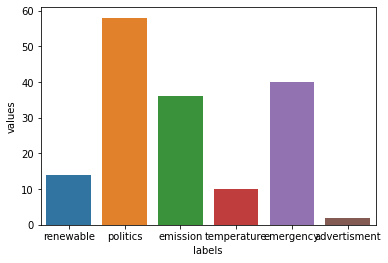

In [ ]:
sns.barplot(data = df_chart
            ,x = 'labels'
            ,y = 'values'
            )